In [52]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# load and dispaly the data set
df = pd.read_csv('/content/Wine_clust.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
# understand the shape of data
df.shape

(178, 13)

In [55]:
# check the informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [56]:
# describe the data set
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [57]:
# check the null values
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


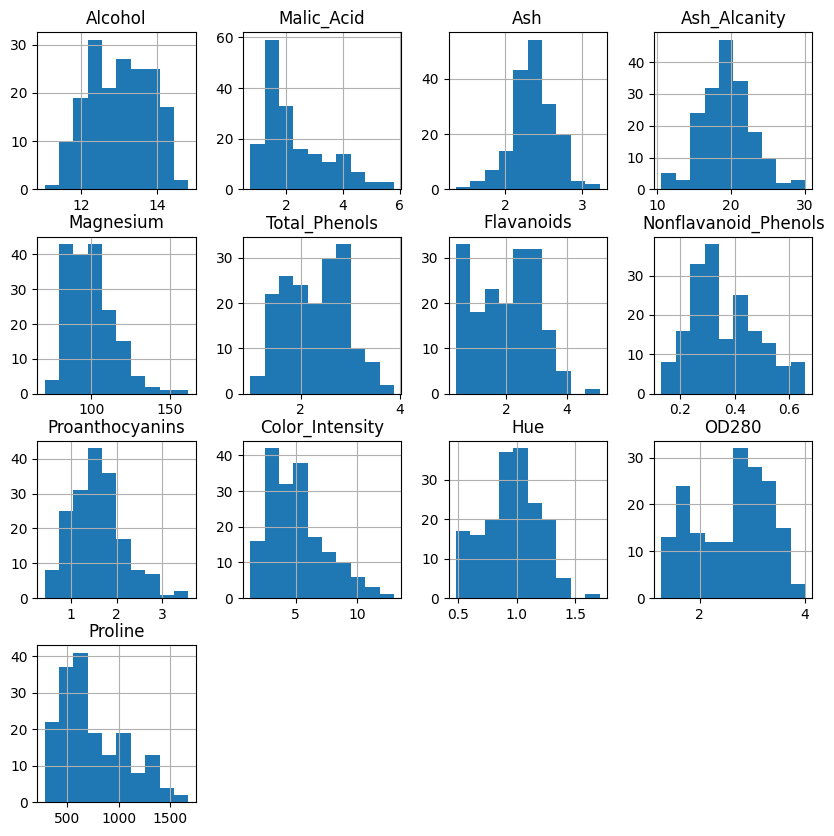

In [58]:
# plot histogram to understand the distribution
df.hist(figsize=(10,10))
plt.show()

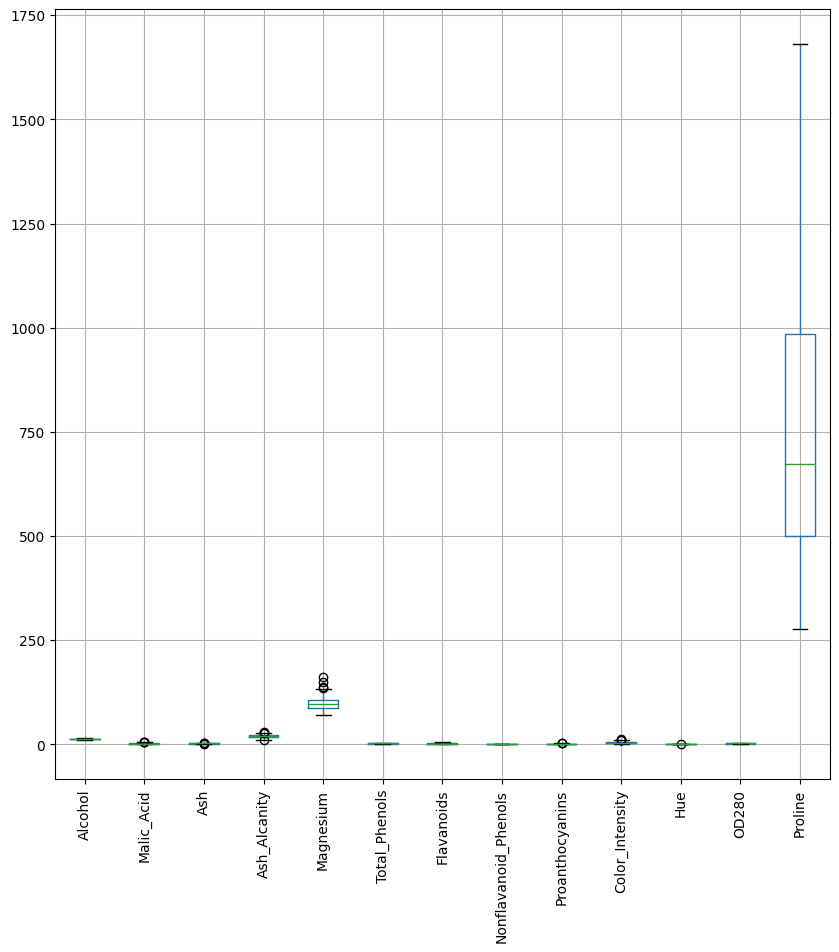

In [59]:
# plot boxplot to visualize the outliers
df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

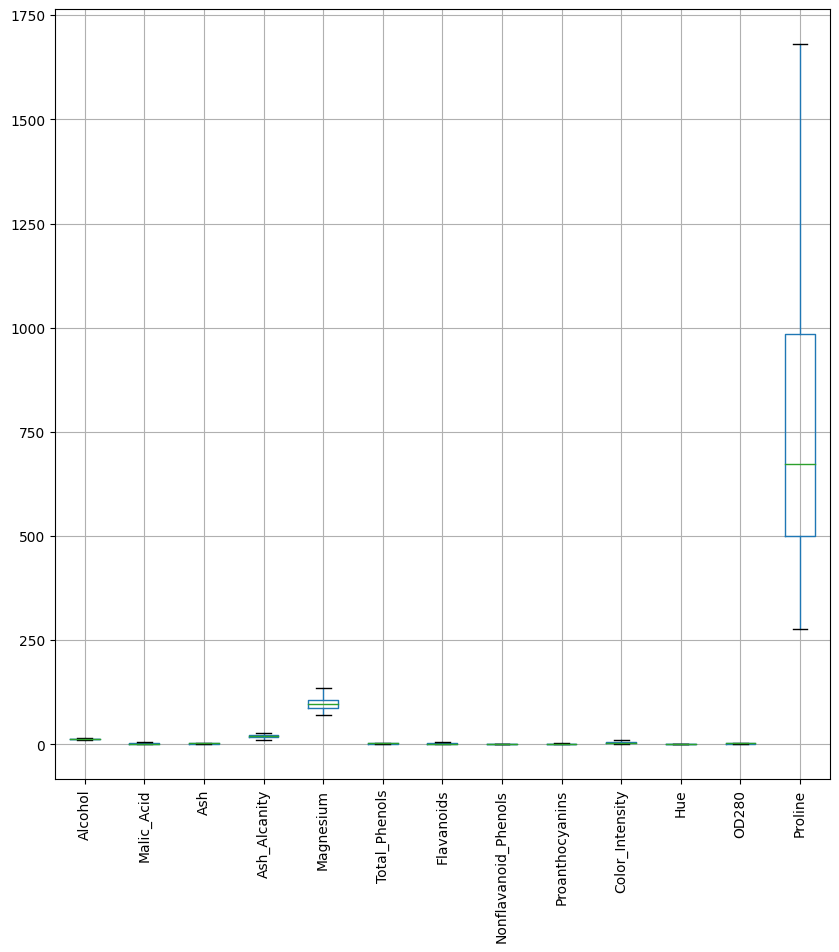

In [60]:
# Handling outliers in the data set using function
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

df = handle_outliers(df, 'Malic_Acid')
df = handle_outliers(df, 'Ash')
df = handle_outliers(df, 'Ash_Alcanity')
df = handle_outliers(df, 'Magnesium')
df = handle_outliers(df, 'Proanthocyanins')
df = handle_outliers(df, 'Color_Intensity')
df = handle_outliers(df, 'Hue')

df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [61]:
# scale the data set
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)
df_scaled

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

# **K-Means Clustering**

In [62]:
# Determine the optimal number of clusters for K-Means using the Elbow method
from enum import auto
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

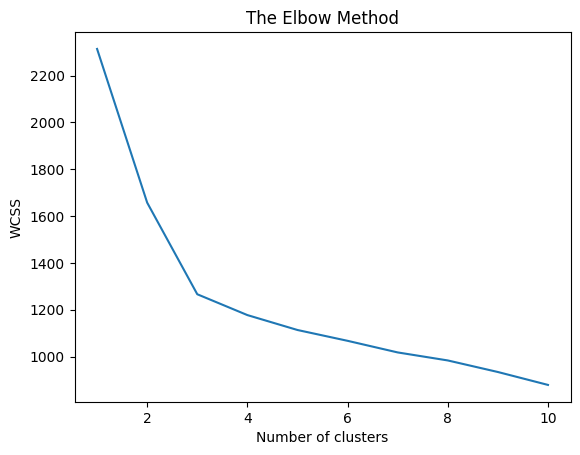

In [63]:
# Plot the wcss for the Elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# create kmean clustering model
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42,n_init="auto")
y_km = kmeans.fit_predict(df_scaled)

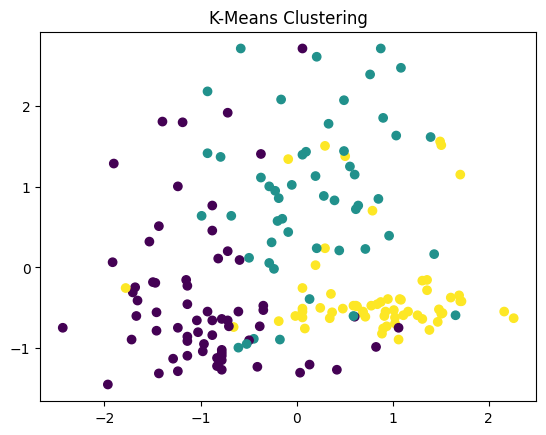

In [65]:
# Scatter plot to visualize the clusters
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_km,cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# **Agglomerative Clustering**

In [66]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [67]:
# create the linkage matrix
merging = linkage(df_scaled, method='ward')

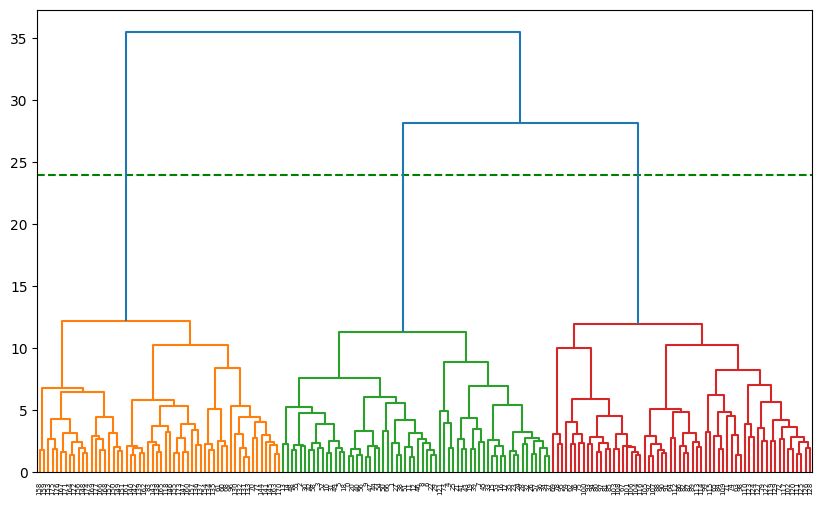

In [68]:
# Plot the dendrogram
plt.figure(figsize=(10,6))
plt.axhline(24,color='green',linestyle='--')
dendrogram(merging)
plt.show()

In [69]:
# create Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


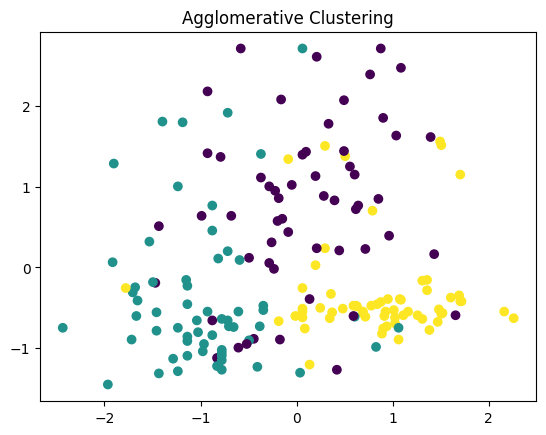

In [70]:
# Scatter plot to visualize the clusters
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_hc,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# **DB SCAN**

In [71]:
# create DB SCAN clustering model
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2,min_samples=5)
y_db = dbscan.fit_predict(df_scaled)

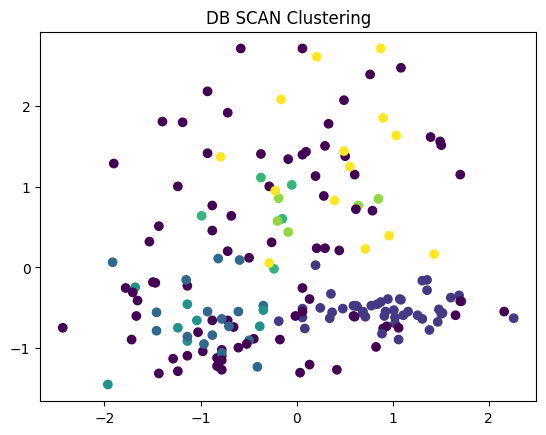

In [72]:
# Scatter plot to visualize the clusters
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_db,cmap='viridis')
plt.title('DB SCAN Clustering')
plt.show()